In [2]:
import numpy as np
import pandas as pd

import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.preprocessing import image


In [ ]:
#!git clone https://github.com/dana-lu/2021-shellhacks.git

In [3]:
import os
os.chdir("/content/")

In [14]:
model  = tf.keras.models.load_model('CNN_model_2.h5')

In [13]:
dict = {
0:'Apple___Apple_scab',
1:'Apple___Black_rot',
2:'Apple___Cedar_apple_rust',
3:'Apple___healthy',
4:'Cherry_(including_sour)___Powdery_mildew',
5:'Cherry_(including_sour)___healthy',
6:'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
7:'Corn_(maize)___Common_rust_',
8:'Corn_(maize)___Northern_Leaf_Blight',
9:'Corn_(maize)___healthy',
10:'Grape___Black_rot',
11:'Grape___Esca_(Black_Measles)',
12:'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
13:'Grape___healthy',
14:'Peach___Bacterial_spot',
15:'Peach___healthy',
16:'Pepper,_bell___Bacterial_spot',
17:'Pepper,_bell___healthy',
18:'Potato___Early_blight',
19:'Potato___Late_blight',
20:'Potato___healthy',
21:'Strawberry___Leaf_scorch',
22:'Strawberry___healthy',
23:'Tomato___Bacterial_spot',
24:'Tomato___Early_blight',
25:'Tomato___Late_blight',
26:'Tomato___Leaf_Mold',
27:'Tomato___Septoria_leaf_spot',
28:'Tomato___Spider_mites Two-spotted_spider_mite',
29:'Tomato___Target_Spot',
30:'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
31:'Tomato___Tomato_mosaic_virus',
32:'Tomato___healthy'
}

Saving 00c8e9a0-1fb8-434b-8981-25511358ddc9___Com.G_SpM_FL 8717_90degFlipTB.JPG to 00c8e9a0-1fb8-434b-8981-25511358ddc9___Com.G_SpM_FL 8717_90degFlipTB.JPG
Plant: Tomato
Status: Spider_mites Two-spotted_spider_mite
Probability: 0.9510022401809692
Early blight (EB) is a disease of potato caused by the fungus Alternaria solani. It is found wherever potatoes are grown. The disease primarily affects leaves and stems, but under favorable weather conditions, and if left uncontrolled, can result in considerable defoliation and enhance the chance for tuber infection.
---------------------------------------------------------------------------------------------




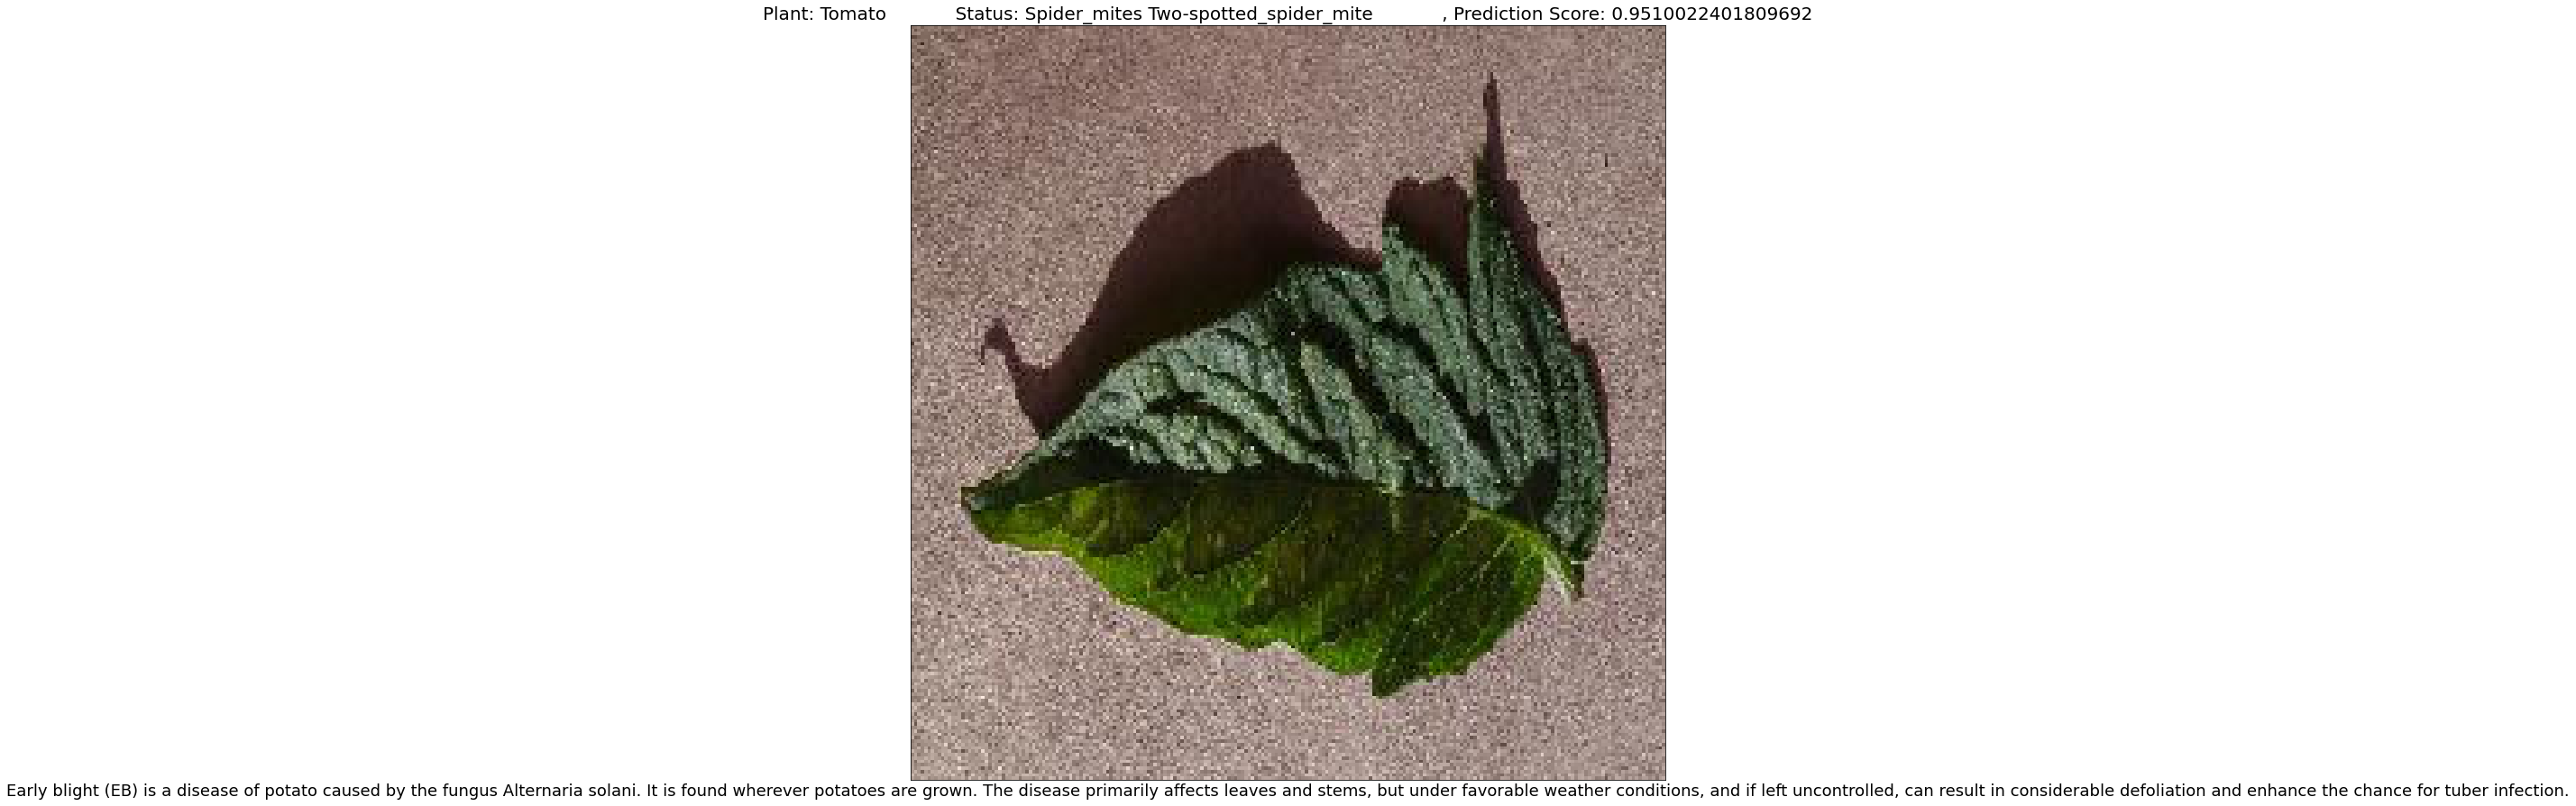

In [33]:
from google.colab import files
uploaded = files.upload()
plt.figure(figsize=(15,25))



for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  plt.subplot(1,1,1)
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  preds = model.predict(images, batch_size = 32)
  predictedClass = np.argmax(preds, axis=1)
  predictedClass = np.vectorize(dict.get)(predictedClass)
  #print(preds[0])
  
  
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)

  Plant = predictedClass[0].split('___')[0]
  Status = predictedClass[0].split('___')[1]
  Probability = np.max(preds)
  text = ''
  if (Probability > .6):
    if (predictedClass[0].split('___')[-1] == 'healthy'):
      text = 'The plant is healthy'
    elif (predictedClass[0] == 'Apple___Apple_scab'):
      text = "Apple scab, caused by the fungus Venturia inaequalis, is a serious fungal disease of apple infecting foliage, blossoms and fruits. Severely infected trees become defoliated and infected fruit are not marketable"
    elif (predictedClass[0] == 'Apple___Black_rot'):
      text = "Black rot is a disease that infects fruit, leaves, and bark caused by the fungus Botryosphaeria obtusa."
    elif (predictedClass[0] == 'Apple___Cedar_apple_rust'):
      text = "Cedar apple rust is a disease caused by a fungus that attacks both the cedar and the apple"
    elif (predictedClass[0] == 'Cherry_(including_sour)___Powdery_mildew'):
      text = "Powdery mildew of sweet and sour cherry is caused by Podosphaera clandestina, an obligate biotrophic fungus. They make the cherry unmarketable due to the covering of white fungal growth on the cherry surface"
    elif (predictedClass[0] == 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'):
      text = "Gray leaf spot (GLS) is a common fungal disease in the United States caused by the pathogen Cercospora zeae-maydis in corn."
    elif (predictedClass[0] == 'Corn_(maize)___Common_rust_'):
      text = "Common rust produces rust-colored to dark brown, elongated pustules on both leaf surfaces. The pustules contain rust spores (urediniospores) that are cinnamon brown in color. Pustules darken as they age. Leaves, as well as sheaths, can be infected."
    elif (predictedClass[0] == 'Corn_(maize)___Northern_Leaf_Blight'):
      text = "Northern corn leaf blight (NCLB) is caused by the fungus Setosphaeria turcica. Symptoms usually appear first on the lower leaves."
    elif (predictedClass[0] == 'Grape___Black_rot'):
      text = "Black rot is a disease that infects fruit, leaves, and bark caused by the fungus Botryosphaeria obtusa."
    elif (predictedClass[0] == 'Grape___Esca_(Black_Measles)'):
      text = "Esca is caused by a complex of fungi"
    elif (predictedClass[0] == 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'):
      text = "A Fungal Leaf Spot Disease of Grapes"
    elif (predictedClass[0] == 'Peach___Bacterial_spot'):
      text = "Leaf symptoms of bacterial spot on peaches and nectarines are generally dark, small lesions, often clustered at the leaf tip where water collects during dews and rain. Leaf tissue around lesions can turn yellow. The pathogen overwinters in dark, gummy branch tips, and diseased twigs"
    elif (predictedClass[0] ==  'Pepper,_bell___Bacterial_spot'):
      text = "Bacterial leaf spot is the most common and destructive disease for peppers"
    elif (predictedClass[0] == 'Potato___Early_blight',):
      text = "Early blight (EB) is a disease of potato caused by the fungus Alternaria solani. It is found wherever potatoes are grown. The disease primarily affects leaves and stems, but under favorable weather conditions, and if left uncontrolled, can result in considerable defoliation and enhance the chance for tuber infection."
    elif (predictedClass[0] == 'Potato___Late_blight'):
      text = "Late blight is caused by the oomycete Phytophthora infestans. Oomycetes are fungus-like organisms also called water molds, but they are not true fungi. There are many different strains of P. infestans."
    elif (predictedClass[0] == 'Strawberry___Leaf_scorch'):
      text = "Scorched strawberry leaves are caused by a fungal infection which affects the foliage of strawberry plantings. The fungus responsible is called Diplocarpon earliana. Strawberries with leaf scorch may first show signs of issue with the development of small purplish blemishes that occur on the topside of leaves."
    elif (predictedClass[0] == 'Tomato___Bacterial_spot'):
      text = "Bacterial spot can affect all above ground parts of a tomato plant, including the leaves, stems, and fruit. Bacterial spot appears on leaves as small (less than ⅛ inch), sometimes water-soaked (i.e., wet-looking) circular areas. Spots may initially be yellow-green, but darken to brownish-red as they age."
    elif (predictedClass[0] == 'Tomato___Early_blight'):
      text = "Early blight is a common tomato disease caused by the fungus Alternaria solani. It can affect almost all parts of the tomato plants, including the leaves, stems, and fruits. The plants may not die, but they will be weakened and will set fewer tomatoes than normal."
    elif (predictedClass[0] == 'Tomato___Late_blight'):
      text = "Late blight is a potentially devastating disease of tomato and potato, infecting leaves, stems and fruits of tomato plants. The disease spreads quickly in fields and can result in total crop failure if untreated."
    elif (predictedClass[0] ==  'Tomato___Leaf_Mold'):
      text = "Tomato leaf mold is a fungal disease that can develop when there are extended periods of leaf wetness and the relative humidity is high (greater than 85 percent). Due to this moisture requirement, the disease is seen primarily in hoop houses and greenhouses."
    elif (predictedClass[0] ==  'Tomato___Septoria_leaf_spot'):
      text = "Septoria leaf spot is caused by a fungus, Septoria lycopersici. It is one of the most destructive diseases of tomato foliage and is particularly severe in areas where wet, humid weather persists for extended periods. Septoria leaf spot usually appears on the lower leaves after the first fruit sets."
    elif (predictedClass[0] ==   'Tomato___Spider_mites Two-spotted_spider_mite'):
      text = "The two-spotted spider mite is the most common mite species that attacks vegetable and fruit crops"
    elif (predictedClass[0] ==  'Tomato___Target_Spot'):
      text = "Target spot of tomato is a fungal disease that attacks a diverse assortment of plants"
    elif (predictedClass[0] ==  'Tomato___Tomato_Yellow_Leaf_Curl_Virus'):
      text = "Tomato yellow leaf curl virus is a DNA virus from the genus Begomovirus and the family Geminiviridae. TYLCV causes the most destructive disease of tomato, and it can be found in tropical and subtropical regions causing severe economic losses"
    elif (predictedClass[0] ==  'Tomato___Tomato_mosaic_virus'):
      text = "Tomato mosaic virus (ToMV) can cause yellowing and stunting of tomato plants resulting in loss of stand and reduced yield. ToMV may cause uneven ripening of fruit, further reducing yield"

    plt.title("Plant: {}            Status: {}            , Prediction Score: {}".format(Plant, Status ,np.max(preds)) , fontdict = {'fontsize' : 20})
    plt.xlabel(text, fontsize=18)
    print(f"Plant: {Plant}")
    print(f"Status: {Status}")
    print(f"Probability: {Probability}")
    print(text)
    print('---------------------------------------------------------------------------------------------')
    print('\n')

  else:
    plt.title("UNKNOWN - Low Probability Score - Please retake picture", fontdict = {'fontsize' : 20})
    text= "UNKNOWN - Low Probability Score - Please retake picture"
    plt.xlabel(text, fontsize=18)
    print(f"Probability: {Probability}")
    print(text)
    print('---------------------------------------------------------------------------------------------')
    print('\n')  